<a href="https://colab.research.google.com/github/wjdgns5/ML_TEST/blob/main/ML_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]
[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 3

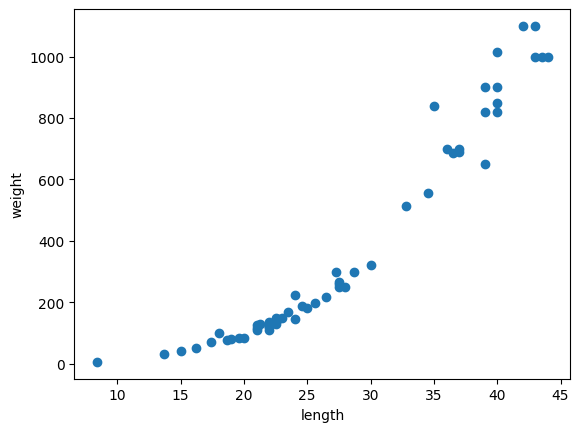

test 스코어 :  0.992809406101064
훈련 스코어 :  0.9698823289099254
test 스코어 :  0.9746459963987609
훈련 스코어 :  0.9804899950518966
[1033.33333333]
[[6. 7. 7.]] [[34  8 14]]


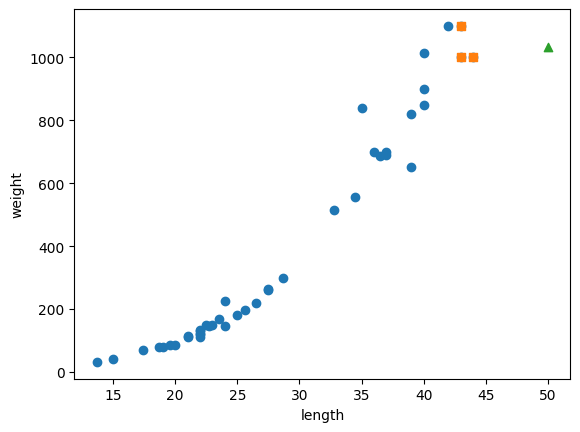

[1033.33333333]


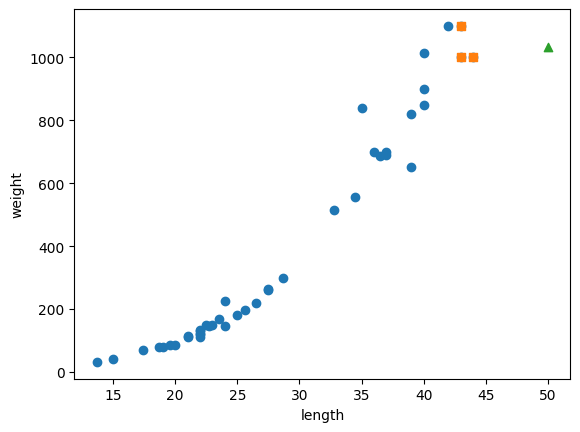

[1241.83860323]
[39.01714496] -709.0186449535477


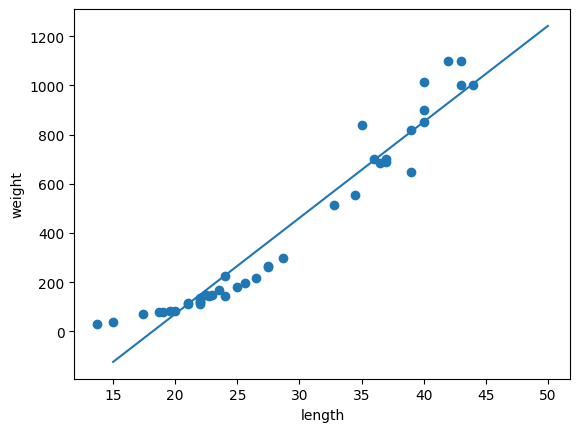

test 스코어 :  0.8247503123313558
훈련 스코어 :  0.939846333997604


In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('drive/MyDrive/ML/Fish.csv')
perch_dataset = data[data.Species == 'Perch'] #농어

print(data);

perch_length = np.array([i for i in perch_dataset.Length2])
perch_weight = np.array([j for j in perch_dataset.Weight])

print(perch_length)
print(perch_weight)


import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


from sklearn.model_selection import train_test_split
train_input, test_input ,train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print("test 스코어 : " , knr.score(test_input, test_target))
print("훈련 스코어 : " ,knr.score(train_input, train_target))

knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("test 스코어 : " , knr.score(test_input, test_target))
print("훈련 스코어 : " ,knr.score(train_input, train_target))
print(knr.predict([[50]]))

distances, indexes = knr.kneighbors([[50]])
print(distances, indexes)

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='s')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(knr.predict([[100]]))
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='s')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print("test 스코어 : " , lr.score(test_input, test_target))
print("훈련 스코어 : " ,lr.score(train_input, train_target))

